## 🌊🚀WebWave: Riding the Tide of Digital Visitor Trends

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

%matplotlib inline

In [6]:
df=pd.read_csv('Thecleverprogrammer.csv')
# df = pd.read_csv("data/Thecleverprogrammer.csv")
df.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [7]:
df.isnull().sum()

Date     0
Views    0
dtype: int64

In [8]:
# df=pd.read_csv('Thecleverprogrammer.csv',parse_dates=['Date'],index_col=['Date'])
# df.tail()

In [9]:
df["Date"] = pd.to_datetime(df["Date"], 
                              format="%d/%m/%Y")
df.set_index('Date', inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 391 entries, 2021-06-01 to 2022-06-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Views   391 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB
None


In [10]:
df.head()

,Views
Date,
2021-06-01,7831
2021-06-02,7798
2021-06-03,7401
2021-06-04,7054
2021-06-05,7973


<Axes: xlabel='Date'>

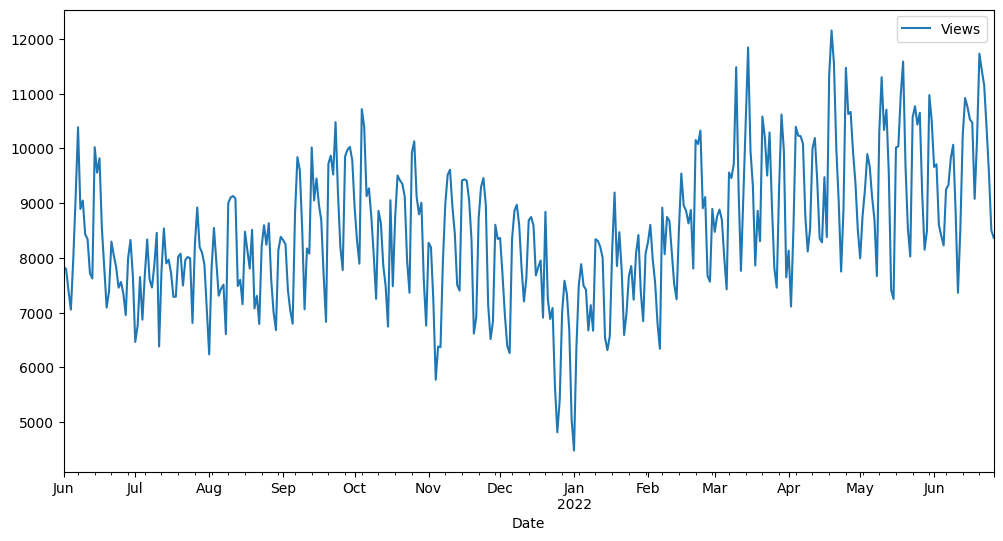

In [11]:
df.plot(figsize=(12,6))

<Figure size 640x480 with 0 Axes>

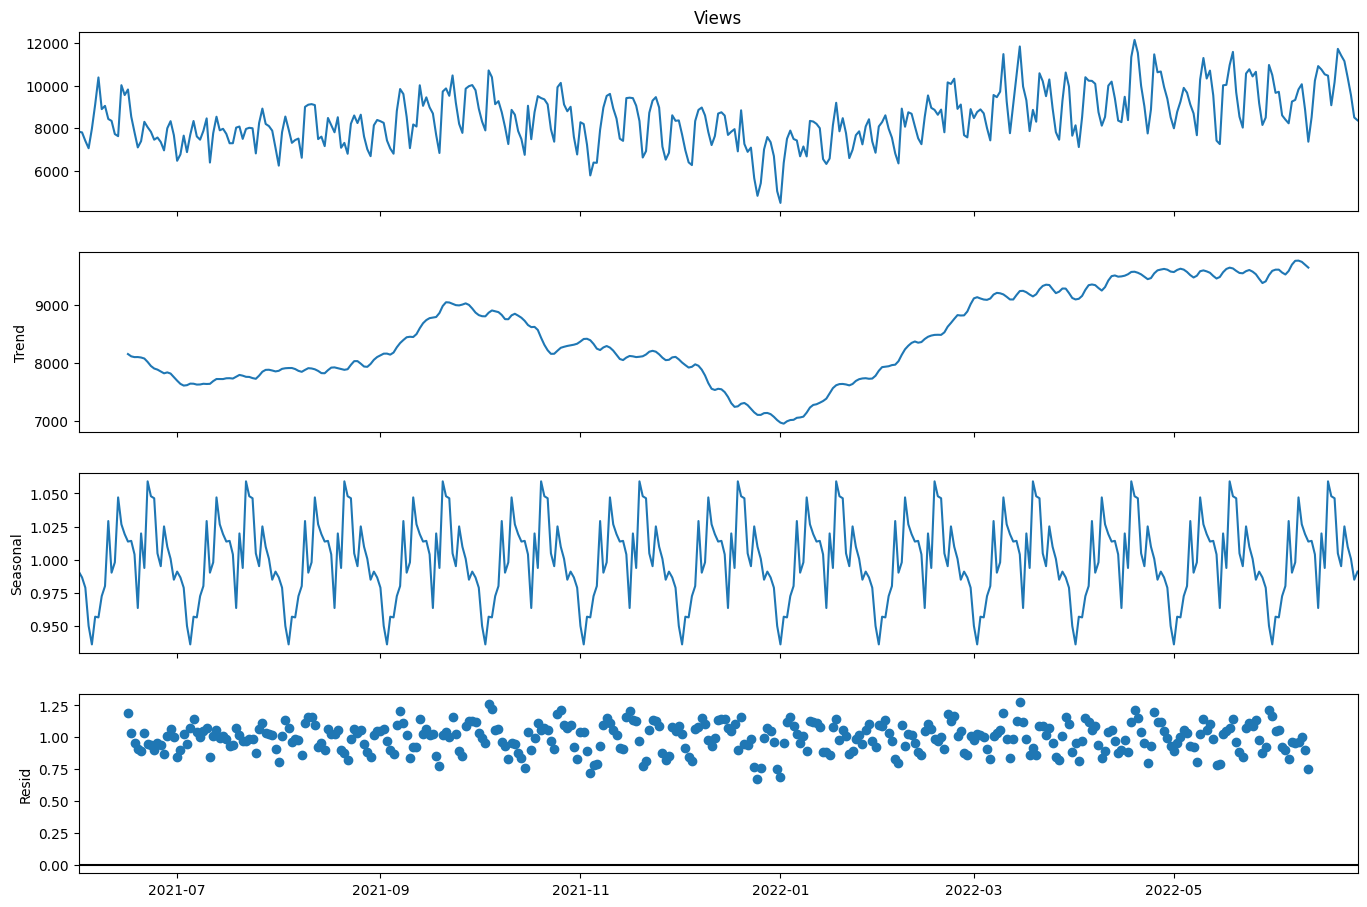

In [12]:
result = seasonal_decompose(df["Views"], 
                            model='multiplicative',
                            period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adf_test(df['Views'])

ADF Statistics: -1.7886419347961529
p- value: 0.3861150593470247
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
## Use Techniques Differencing
df['Views First Difference']=df['Views']-df['Views'].shift(1)

In [17]:
df.head()

,Views,Views First Difference
Date,,
2021-06-01,7831,NaN
2021-06-02,7798,-33.0
2021-06-03,7401,-397.0
2021-06-04,7054,-347.0
2021-06-05,7973,919.0


In [18]:
adf_test(df['Views First Difference'].dropna())

ADF Statistics: -7.594211195473269
p- value: 2.485100667139845e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

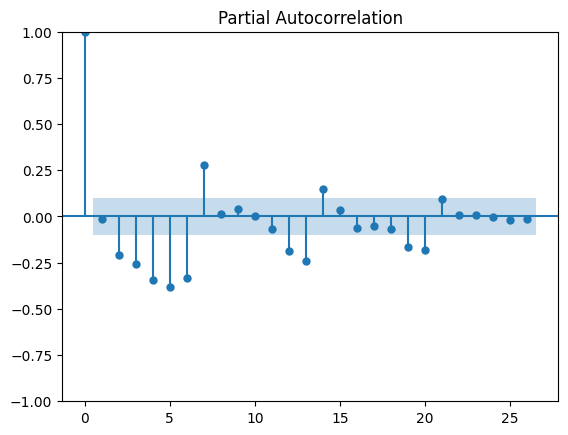

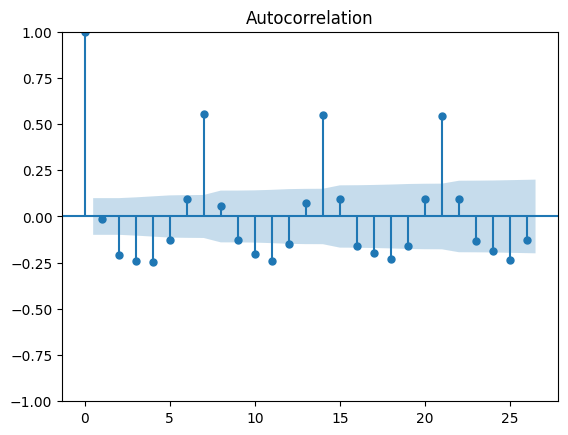

In [20]:
result = plot_pacf(df["Views First Difference"].dropna())
acf = plot_acf(df["Views First Difference"].dropna())


### Applying ARIMA Model

In [21]:
from statsmodels.tsa.arima.model import ARIMA

p,d,q = 4,1,2
model=ARIMA(df['Views'],
                order=(p, d, q))
model=model.fit()
print(model.summary())

predictions = model.predict(0, len(df)+30)
print(predictions)

c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Views   No. Observations:                  391
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -3183.651
Date:                Sat, 20 Jan 2024   AIC                           6381.302
Time:                        21:35:03   BIC                           6409.065
Sample:                    06-01-2021   HQIC                          6392.307
                         - 06-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2904      0.114     -2.549      0.011      -0.514      -0.067
ar.L2          0.1631      0.097      1.688      0.091      -0.026       0.352
ar.L3         -0.3349      0.061     -5.491      0.0

<Axes: xlabel='Date'>

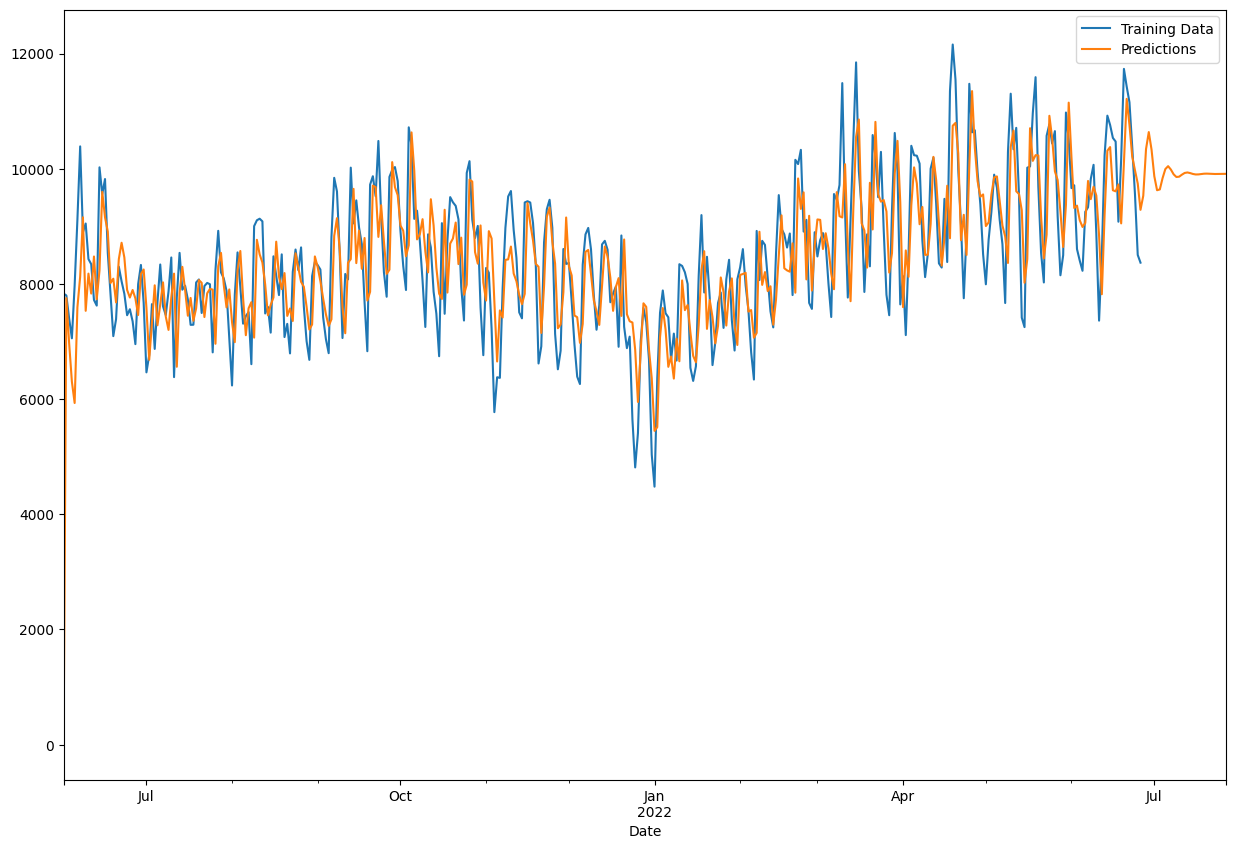

In [22]:
df["Views"].plot(legend=True, 
                     label="Training Data", 
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

NOTE: Data is seasonal so arima is not working well for our model 

### Applying SARIMAX Model (Seasonal data)

In [23]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 3,1,3
model=SARIMAX(df['Views'],
                order=(p, d, q),
                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

predictions = model.predict(len(df)-3, len(df)+60)
print(predictions)

c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood               -3132.761
Date:                            Sat, 20 Jan 2024   AIC                           6291.522
Time:                                    21:35:12   BIC                           6342.676
Sample:                                06-01-2021   HQIC                          6311.824
                                     - 06-26-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6191      0.215      7.534      0.000       1.198       2.040
ar.L2         -1.4609      0.266   

<Axes: xlabel='Date'>

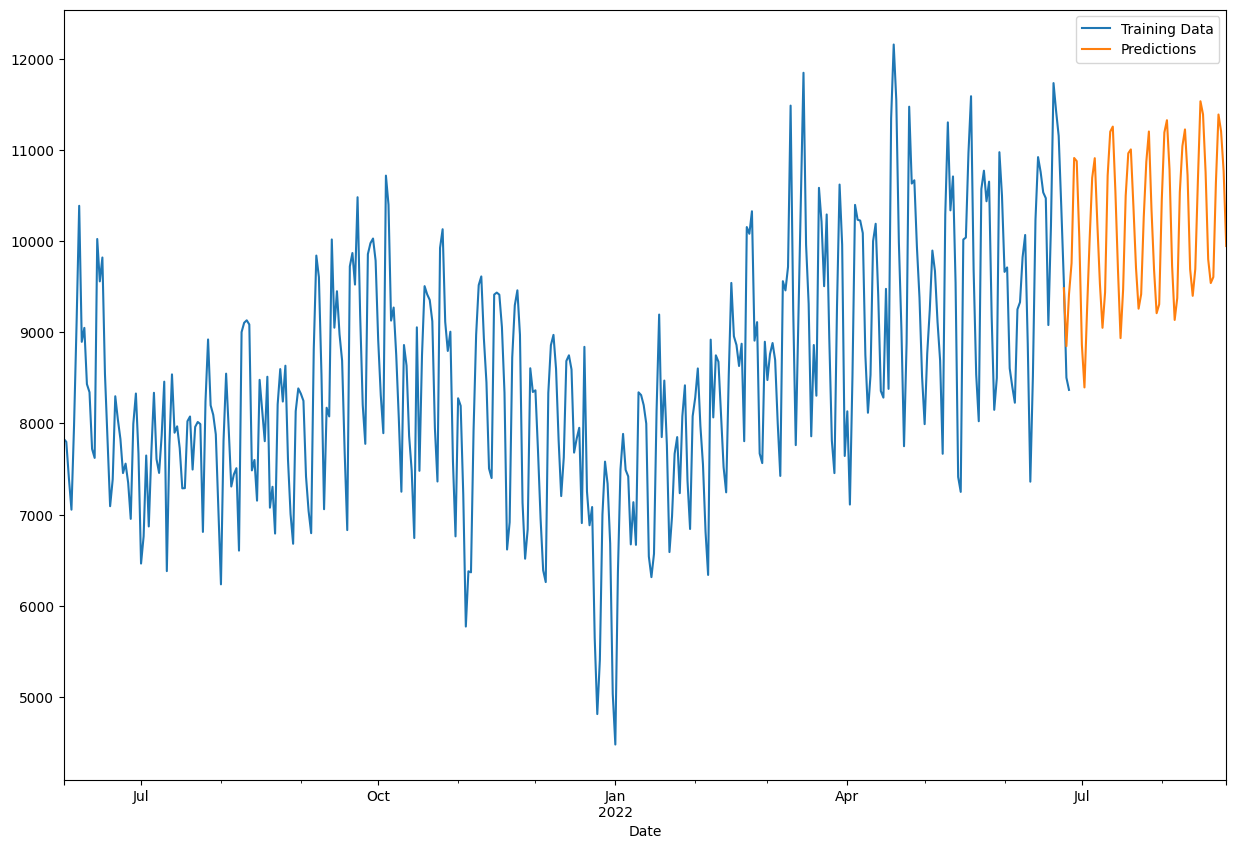

In [24]:
df["Views"].plot(legend=True, 
                     label="Training Data", 
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")